In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

1.15.0


Using TensorFlow backend.


2.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Zad 

Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)



(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750], dtype=int64))
(32, 32, 3)


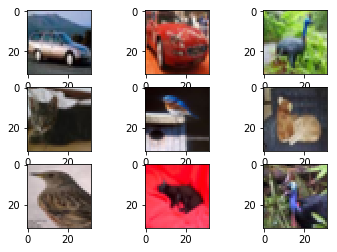

In [4]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

### Normalize

In [5]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(32, 32, 3)

In [6]:
num_classes

4

# Zadanie 
Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout?
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

Object `Dropout` not found.


In [8]:
# history_1 = History()
# model = Sequential()
# model.add(Conv2D(6, (5,5), activation="relu", input_shape= X_train[0].shape))
# model.add(MaxPooling2D(2))
# model.summary()

In [9]:
history_1 = History()
model = Sequential()
model.add(Conv2D(6, (5,5), activation="relu", input_shape= X_train[0].shape))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (5,5), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
______________________________________

In [10]:
early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_1])
model.evaluate(X_test,y_test)

# early_stopping = EarlyStopping(patience=30,monitor="val_loss")
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
# model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[ history_1])
# model.evaluate(X_test,y_test)


Train on 5250 samples, validate on 1750 samples
Epoch 1/100
5250/5250 [==============================] - 4s 822us/step - loss: 1.0545 - categorical_accuracy: 0.5293 - val_loss: 0.9076 - val_categorical_accuracy: 0.6240
Epoch 2/100
5250/5250 [==============================] - 2s 407us/step - loss: 0.8362 - categorical_accuracy: 0.6470 - val_loss: 0.8395 - val_categorical_accuracy: 0.6583
Epoch 3/100
5250/5250 [==============================] - 2s 431us/step - loss: 0.7772 - categorical_accuracy: 0.6817 - val_loss: 0.7656 - val_categorical_accuracy: 0.7000
Epoch 4/100
5250/5250 [==============================] - 2s 433us/step - loss: 0.7260 - categorical_accuracy: 0.7034 - val_loss: 0.8260 - val_categorical_accuracy: 0.6503
Epoch 5/100
5250/5250 [==============================] - 2s 410us/step - loss: 0.6784 - categorical_accuracy: 0.7234 - val_loss: 0.7222 - val_categorical_accuracy: 0.7103
Epoch 6/100
5250/5250 [==============================] - 2s 406us/step - loss: 0.6492 - categori

[1.7831172506809234, 0.7227500081062317]

In [11]:
model.predict_proba(X_test)

array([[9.5912844e-07, 1.0233733e-06, 7.6099050e-01, 2.3900752e-01],
       [9.9386686e-01, 1.2192960e-04, 6.0038492e-03, 7.3971919e-06],
       [2.0144828e-09, 9.9999630e-01, 9.2930064e-10, 3.6943181e-06],
       ...,
       [3.8006415e-03, 1.2243678e-06, 4.5330174e-02, 9.5086801e-01],
       [2.0554716e-11, 1.5015723e-09, 1.5904577e-06, 9.9999845e-01],
       [3.0515768e-04, 9.9965465e-01, 1.0293464e-09, 4.0180807e-05]],
      dtype=float32)

In [12]:
model.predict_classes(X_test)

array([2, 0, 1, ..., 3, 3, 1], dtype=int64)

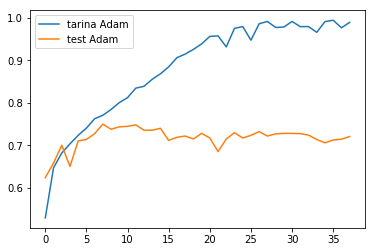

In [18]:
plt.plot(history_1.history['categorical_accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_categorical_accuracy'], label = "test Adam")


plt.legend()
plt.show()

In [19]:
np.savetxt("cifar_10_part_conv_tr.txt", history_1.history['categorical_accuracy'])
np.savetxt("cifar_10_part_conv_te.txt", history_1.history['val_categorical_accuracy'])